### Import modules

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

### Load data

In [2]:
data_path = '../data/raw'

genres = os.listdir(data_path)
print("Genres disponibles :", genres)

for genre in genres:
    files = os.listdir(os.path.join(data_path, genre))
    print(f"Genre: {genre}, Nombre de fichiers: {len(files)}")
    print(f"Premiers fichiers: {files[:5]}")

Genres disponibles : ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Genre: blues, Nombre de fichiers: 100
Premiers fichiers: ['blues.00000.au', 'blues.00001.au', 'blues.00002.au', 'blues.00003.au', 'blues.00004.au']
Genre: classical, Nombre de fichiers: 100
Premiers fichiers: ['classical.00000.au', 'classical.00001.au', 'classical.00002.au', 'classical.00003.au', 'classical.00004.au']
Genre: country, Nombre de fichiers: 100
Premiers fichiers: ['country.00000.au', 'country.00001.au', 'country.00002.au', 'country.00003.au', 'country.00004.au']
Genre: disco, Nombre de fichiers: 100
Premiers fichiers: ['disco.00000.au', 'disco.00001.au', 'disco.00002.au', 'disco.00003.au', 'disco.00004.au']
Genre: hiphop, Nombre de fichiers: 100
Premiers fichiers: ['hiphop.00000.au', 'hiphop.00001.au', 'hiphop.00002.au', 'hiphop.00003.au', 'hiphop.00004.au']
Genre: jazz, Nombre de fichiers: 100
Premiers fichiers: ['jazz.00000.au', 'jazz.00001.au', 'jazz.00002

### Visualize audio file

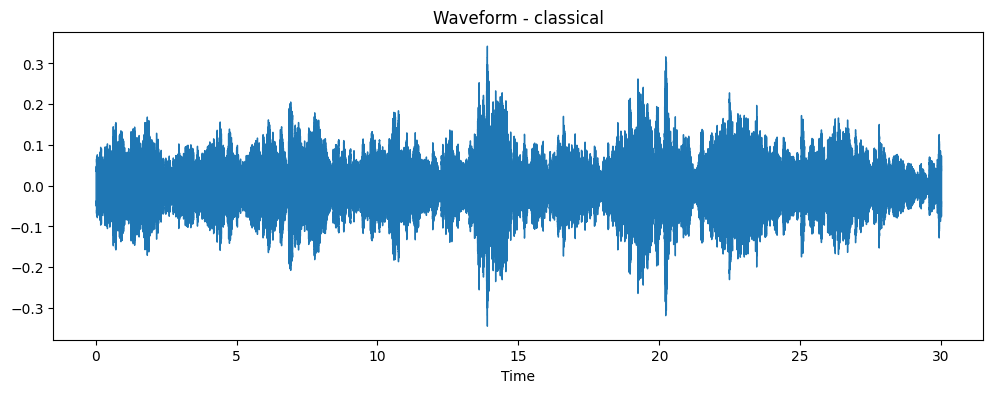

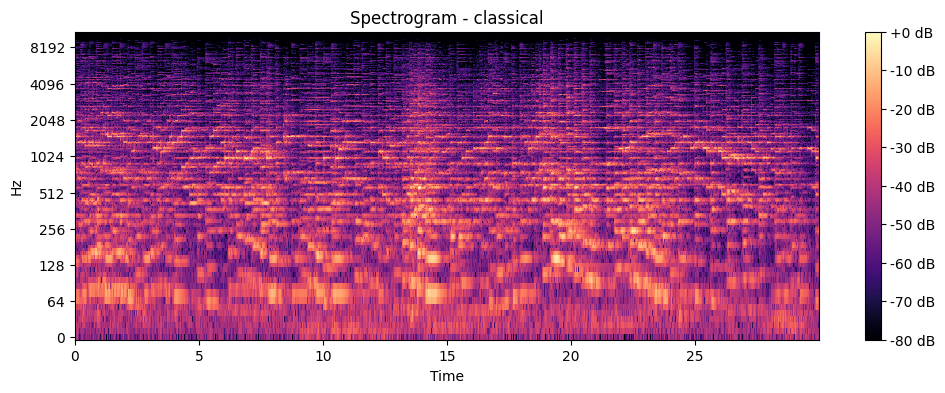

In [16]:
genre_example = 'classical'
file_example = os.path.join(data_path, genre_example, os.listdir(os.path.join(data_path, genre_example))[0])
y, sr = librosa.load(file_example, duration=30)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform - {genre_example}')
plt.show()

plt.figure(figsize=(12, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram - {genre_example}')
plt.show()

### Extract audio features

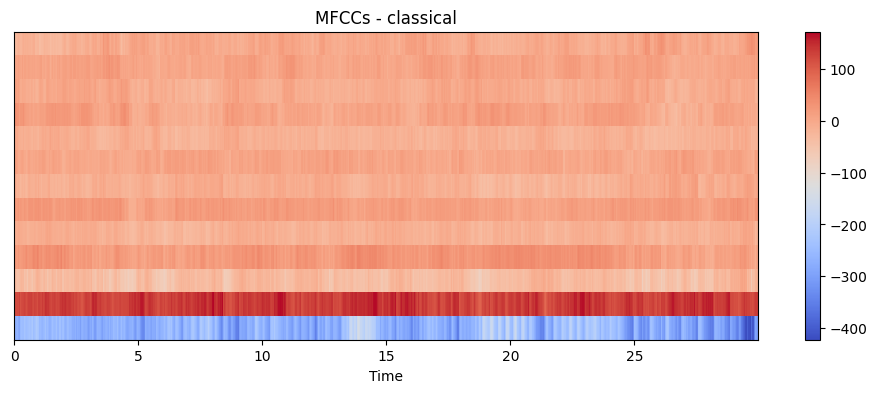

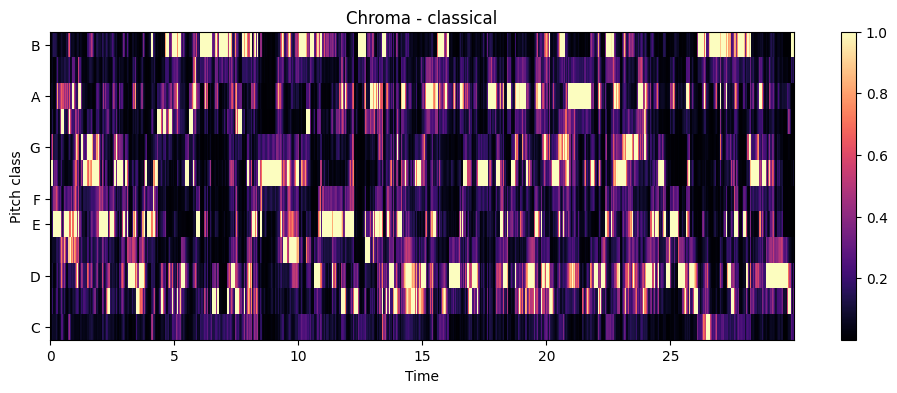

In [17]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title(f'MFCCs - {genre_example}')
plt.show()

chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title(f'Chroma - {genre_example}')
plt.show()

### Process and prepare data for training

In [19]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=30) 
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    return mfccs, chroma

In [20]:
all_features = []
all_labels = []

for genre in genres:
    for file in os.listdir(os.path.join(data_path, genre)):
        file_path = os.path.join(data_path, genre, file)
        mfccs, chroma = extract_features(file_path)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        chroma_mean = np.mean(chroma.T, axis=0)
        features = np.hstack([mfccs_mean, chroma_mean])
        all_features.append(features)
        all_labels.append(genre)

df_features = pd.DataFrame(all_features)
df_labels = pd.Series(all_labels)

print("Dataset size :", df_features.shape)

Dataset size : (1000, 25)


In [21]:
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-113.619385,121.553017,-19.151056,42.345768,-6.371168,18.613033,-13.692060,15.339379,-12.283617,10.973775,...,0.439980,0.244634,0.247802,0.335615,0.364576,0.435647,0.295841,0.314634,0.406560,0.384770
1,-207.581512,123.997147,8.939115,35.870758,2.919971,21.518787,-8.555368,23.355938,-10.101037,11.906445,...,0.320969,0.211586,0.200908,0.331005,0.397647,0.560676,0.384379,0.255474,0.284959,0.334238
2,-90.776344,140.448608,-29.100559,31.687340,-13.975973,25.741686,-13.644712,11.623112,-11.775921,9.700466,...,0.315254,0.408135,0.547083,0.321775,0.304787,0.288517,0.334242,0.401911,0.384308,0.588190
3,-199.462006,150.094742,5.649167,26.870144,1.755440,14.236880,-4.828873,9.297849,-0.753142,8.147393,...,0.524569,0.547074,0.657113,0.511671,0.355630,0.251690,0.246386,0.315209,0.316543,0.382855
4,-160.291855,126.195763,-35.602501,22.151167,-32.487640,10.862023,-23.357162,0.500523,-11.804770,1.203878,...,0.391552,0.255906,0.192804,0.530582,0.253942,0.139215,0.276555,0.324336,0.555298,0.273030


### Save processed data

In [22]:
df_features.to_csv('../data/processed/features.csv', index=False)
df_labels.to_csv('../data/processed/labels.csv', index=False)